In [1]:
import numpy as np
import math
import os.path
import csv
import glob
import tensorflow as tf
import h5py as h5py
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model, load_model

In [2]:
import imageio
import matplotlib.pyplot as plt
from mlxtend.image import extract_face_landmarks
from scipy.spatial import distance
import cv2

In [4]:
def eye_aspect_ratio(eye):
	A = distance.euclidean(eye[1], eye[5])
	B = distance.euclidean(eye[2], eye[4])
	C = distance.euclidean(eye[0], eye[3])
	ear = (A + B) / (2.0 * C)
	return ear

In [5]:
def mouth_aspect_ratio(mouth):
    A = distance.euclidean(mouth[14], mouth[18])
    C = distance.euclidean(mouth[12], mouth[16])
    mar = (A ) / (C)
    return mar

In [6]:
def circularity(eye):
    A = distance.euclidean(eye[1], eye[4])
    radius  = A/2.0
    Area = math.pi * (radius ** 2)
    p = 0
    p += distance.euclidean(eye[0], eye[1])
    p += distance.euclidean(eye[1], eye[2])
    p += distance.euclidean(eye[2], eye[3])
    p += distance.euclidean(eye[3], eye[4])
    p += distance.euclidean(eye[4], eye[5])
    p += distance.euclidean(eye[5], eye[0])
    return 4 * math.pi * Area /(p**2)

In [7]:
def mouth_over_eye(eye):
    ear = eye_aspect_ratio(eye)
    mar = mouth_aspect_ratio(eye)
    mouth_eye = mar/ear
    return mouth_eye

In [8]:
def getFrame(sec):
    start = 180000
    vidcap.set(cv2.CAP_PROP_POS_MSEC, start + sec*1000)
    hasFrames,image = vidcap.read()
    return hasFrames, image

In [19]:
import os
def get_fold_respodents(path):
    l=os.listdir(path=path)
    return l
def get_fold_labels(path):
    return os.listdir(path)

In [20]:
paths=["Dataset//Fold 1//1//5.MOV","Dataset//Fold 1//1//10.MOV","Dataset//Fold 1//2//0.MOV"]


In [21]:
data=[]
labels=[]
respondent=[]

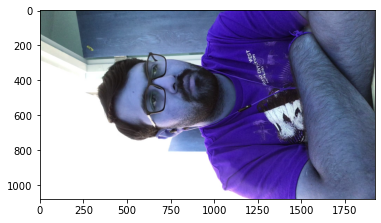

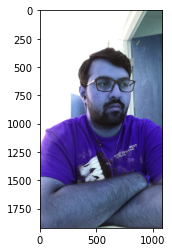

path is Dataset//Fold 1//1//0.MOV
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
26

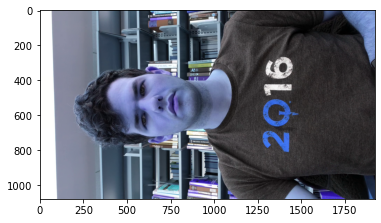

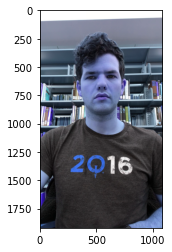

path is Dataset//Fold 1//2//5.MOV
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
26

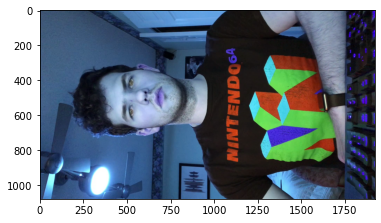

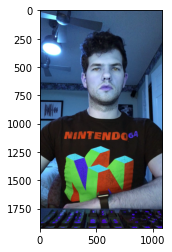

path is Dataset//Fold 1//2//10.mov
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
2

In [23]:
#####################
#######################################
#Dataset//Fold 1//1//0.MOV
#Dataset//Fold 1//2//5.MOV
# 'Dataset//Fold 1//2//10.mov'#####################
#############################################
#############################################
path2=['Dataset//Fold 1//1//0.MOV','Dataset//Fold 1//2//5.MOV','Dataset//Fold 1//2//10.mov']
for i in path2:
    tes=int(i.split('//')[3].split('.')[0])
    rs=int(i.split('//')[2])
    vidcap = cv2.VideoCapture(i)
    sec = 0
    frameRate = 1
    success, image  = getFrame(sec)
    plt.imshow(image)
    plt.show()
    image=cv2.rotate(image,cv2.cv2.ROTATE_90_CLOCKWISE)
    plt.imshow(image)
    plt.show()
    count = 0
    print('path is {}'.format(i))
    while success and count < 300:
        
        landmarks = extract_face_landmarks(image)
        #print(landmarks.shape)

        if (landmarks is not None):
            count += 1
            data.append(np.array(landmarks))
            if(tes<7):
                labels.append(0)
            else:
                labels.append(1)
            respondent.append(rs)
            sec = sec + frameRate
            sec = round(sec, 2)
            success, image = getFrame(sec)
            image=cv2.rotate(image,cv2.cv2.ROTATE_90_CLOCKWISE)
            print(count)
        else:  
            sec = sec + frameRate
            sec = round(sec, 2)
            success, image = getFrame(sec)

            print("not detected")


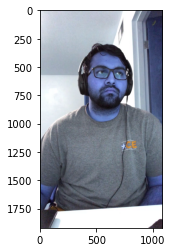

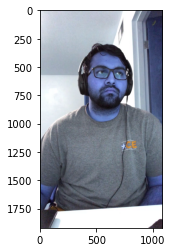

path is Dataset//Fold 1//1//5.MOV
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
26

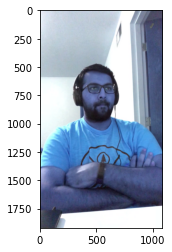

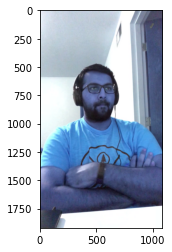

path is Dataset//Fold 1//1//10.MOV
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
not detected
21
22
23
24
25
26
27
28
29
not detected
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262

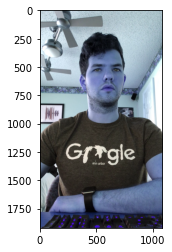

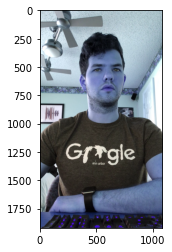

path is Dataset//Fold 1//2//0.MOV
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
26

In [24]:

for i in paths:
    tes=int(i.split('//')[3].split('.')[0])
    rs=int(i.split('//')[2])
    vidcap = cv2.VideoCapture(i)
    sec = 0
    frameRate = 1
    success, image  = getFrame(sec)
    plt.imshow(image)
    plt.show()
    #image=cv2.rotate(image,cv2.cv2.ROTATE_90_CLOCKWISE)
    plt.imshow(image)
    plt.show()
    count = 0
    print('path is {}'.format(i))
    while success and count < 300:
        
        landmarks = extract_face_landmarks(image)
        #print(landmarks.shape)

        if (landmarks is not None):
            count += 1
            data.append(np.array(landmarks))
            if(tes<7):
                labels.append(0)
            else:
                labels.append(1)
            respondent.append(rs)
            sec = sec + frameRate
            sec = round(sec, 2)
            success, image = getFrame(sec)
            #image=cv2.rotate(image,cv2.cv2.ROTATE_90_CLOCKWISE)
            print(count)
        else:  
            sec = sec + frameRate
            sec = round(sec, 2)
            success, image = getFrame(sec)

            print("not detected")


In [25]:
labels=np.array(labels)
respondent=np.array(respondent)
data=np.array(data)

In [26]:
np.save('data.npy',data)

In [27]:
np.save('labels.npy',labels)
np.save('respondents.npy',respondent)
np.save('landmarks.npy',landmarks)

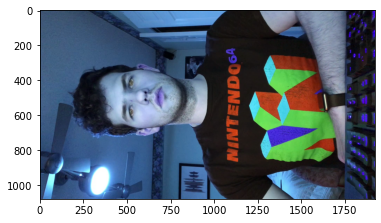

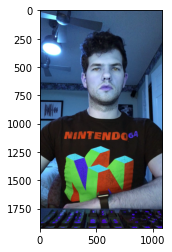

path is Dataset//Fold 1//5/5.MOV
1
2
3
4
5
6


KeyboardInterrupt: 

In [51]:
vidcap = cv2.VideoCapture('Dataset//Fold 1//2//10.mov')
sec = 0
frameRate = 1
success, image  = getFrame(sec)
plt.imshow(image)
plt.show()
image=cv2.rotate(image,cv2.cv2.ROTATE_90_CLOCKWISE)
plt.imshow(image)
plt.show()
count = 0
print('path is {}'.format(path))
while success and count < 300:
    
    landmarks = extract_face_landmarks(image)
    #print(landmarks.shape)

    if (landmarks is not None):
        count += 1
        data.append(np.array(landmarks))
        if(7<7):
            labels.append(0)
        else:
            labels.append(1)
        respondent.append(2)
        sec = sec + frameRate
        sec = round(sec, 2)
        success, image = getFrame(sec)
        image=cv2.rotate(image,cv2.cv2.ROTATE_90_CLOCKWISE)
        print(count)
    else:  
        sec = sec + frameRate
        sec = round(sec, 2)
        success, image = getFrame(sec)

        print("not detected")

In [58]:
data.shape

(1800, 68, 2)

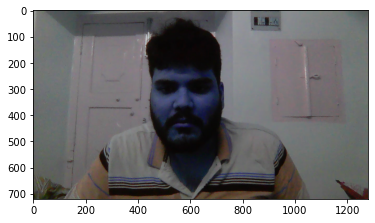

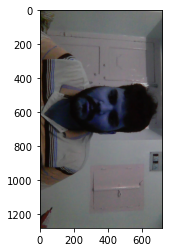

not detected
1
not detected
2
not detected
3
not detected
4
not detected
5
not detected
6
not detected
7
not detected
8
not detected
9
not detected
10
not detected
11
not detected
12
not detected
13
not detected
14
not detected
15
not detected
16
not detected
17
not detected
18
not detected
19
not detected
20


In [16]:
landmarks=[]
labels=[]
data=[]
vidcap = cv2.VideoCapture('test.mp4')
sec = 0
frameRate = 1
success, image  = getFrame(sec)
plt.imshow(image)
plt.show()
image=cv2.rotate(image,cv2.cv2.ROTATE_90_CLOCKWISE)
plt.imshow(image)
plt.show()
count = 0
#print('path is {}'.format(i))
while success and count < 20:
    
    landmarks = extract_face_landmarks(image)
    #print(landmarks.shape)

    if (landmarks is not None):
        count += 1
        data.append(np.array(landmarks))
        labels.append(1)
        # if(tes<7):
        #     labels.append(0)
        # else:
        #     labels.append(1)
        #respondent.append(rs)
        sec = sec + frameRate
        sec = round(sec, 2)
        success, image = getFrame(sec)
        image=cv2.rotate(image,cv2.cv2.ROTATE_90_CLOCKWISE)
        print(count)
    else:  
        sec = sec + frameRate
        sec = round(sec, 2)
        success, image = getFrame(sec)

        print("not detected")


In [17]:
moe=[]
mar=[]
ear=[]
circu=[]
y=[]
for i in data:

    eye=i[36:67]
    ear.append(eye_aspect_ratio(eye))
    mar.append(mouth_aspect_ratio(eye))
    moe.append(mouth_over_eye(eye))
    circu.append(circularity(eye))

In [18]:
np.save('test.npy',np.array(list(zip(ear,mar,moe,circu))))
np.save('label_test.npy',np.array(labels))